# Network science basics

Un _grafo_ è una coppia $G = (V, E)$. Gli elementi $v \in V$ sono chiamati _vertici_. $E \subset V \times V$ e i suoi elementi $(i, j) \in E$, tali che $i, j \in V$, sono chimati _archi_.

**Sinonimi**:
* grafo: rete (EN: network)
* vertici: nodi, attori, unità, elementi
* archi: links, connessioni, spigoli

In [1]:
library(igraph)
igraph_options(vertex.frame.color = "white", vertex.frame.size = 1)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




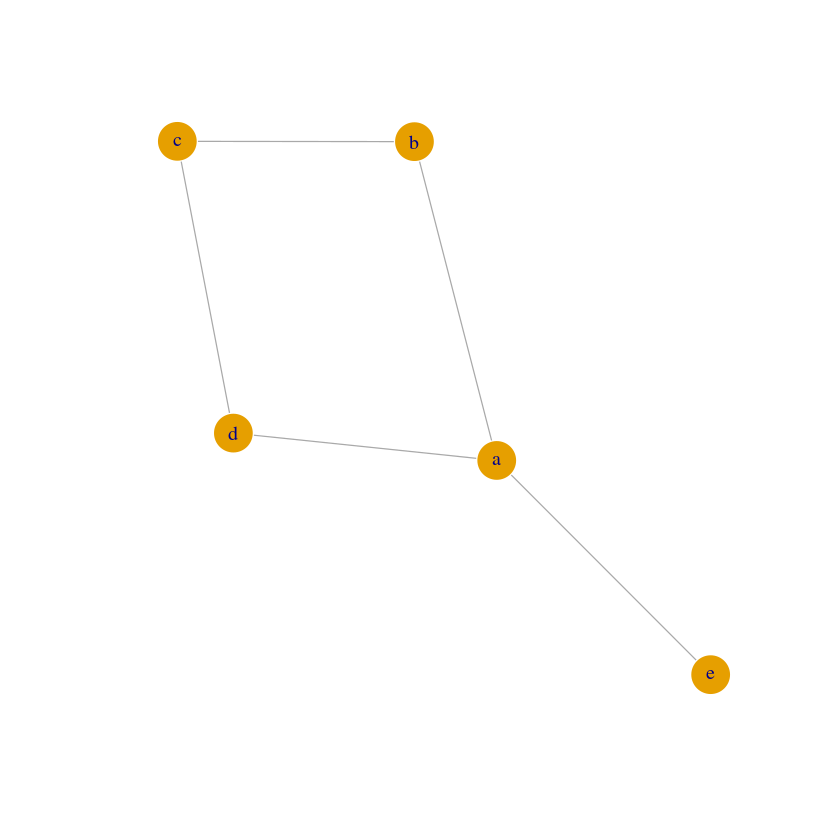

In [2]:
G <- make_graph(edges = c("a", "b", "b", "c", "a", "d", "c", "d", "a", "e"), directed = FALSE)
plot(G)

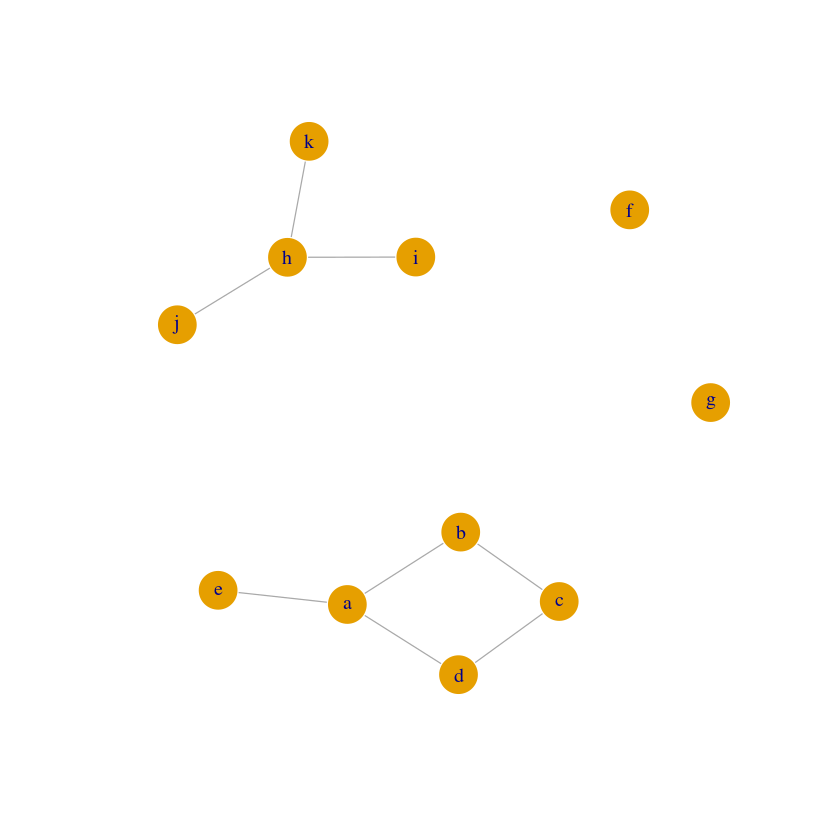

In [3]:
G <- make_graph(edges = c("a", "b", "b", "c", "a", "d", "c", "d", "a", "e", "h", "i", "h", "j", "h", "k"), 
                isolates = c("f", "g"),
                directed = FALSE)
plot(G)

In [4]:
V(G)
E(G)

+ 11/11 vertices, named, from 989f894:
 [1] a b c d e h i j k f g

+ 8/8 edges from 989f894 (vertex names):
[1] a--b b--c a--d c--d a--e h--i h--j h--k

#### Osservazione:

In programmazione, solitamente, è sconsigliato usare lettere maiuscole come nomi di variabili, però in questo caso facciamo un'eccezione. La notazione `V(G)` della cella precedente è identica a quella che useremmo in matematica per riferirci all'insieme dei vertici di $G$.

## Un po' di storia: quando sono "nati" i grafi e la teoria dei grafi?

* I sette ponti di Königsberg: 
> _E' possibile fare un giro della città di Königsberg, attraversando tutti i ponti una e una sola volta (tornando o meno al punto di partenza)?_

Eulero (orig. Leonhard Euler), nel 1736, risponde a questa domanda utilizzando ponendo le fondamenta di quella che sarà la teoria dei grafi!

![I sette ponti di Königsberg](https://upload.wikimedia.org/wikipedia/commons/5/5d/Konigsberg_bridges.png)

In [5]:
library(igraphdata)
data(Koenigsberg)

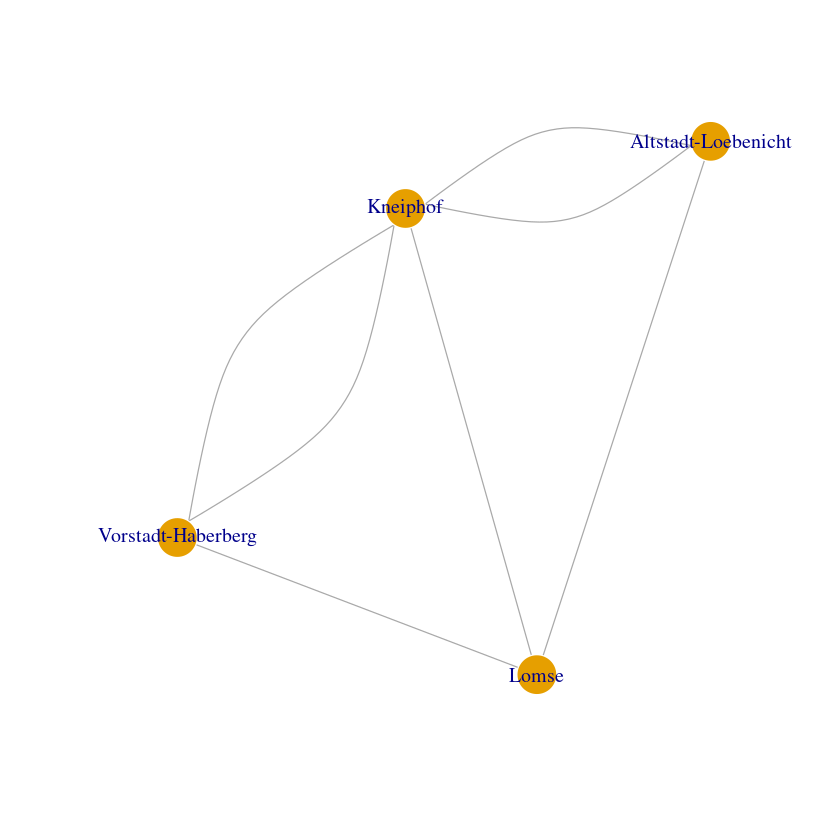

In [6]:
Koenigsberg_layout <- layout_nicely(Koenigsberg)
plot(Koenigsberg, layout = Koenigsberg_layout)

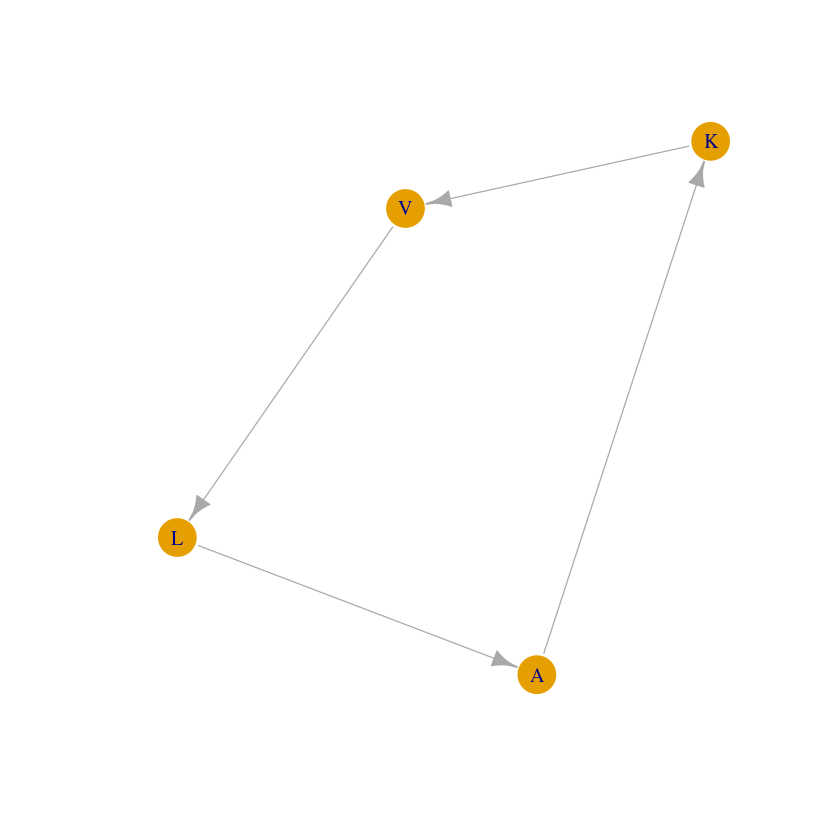

In [7]:
G1 <- make_graph(edges = c("K", "V", "V", "L", "L", "A", "A", "K"))
plot(G1, layout = Koenigsberg_layout)

Passeggiata chiusa, o _circuito_.
Un circuito Euleriano su un multigrafo è un circuito che tocca tutti i suoi archi una e una sola volta.

Notiamo che...

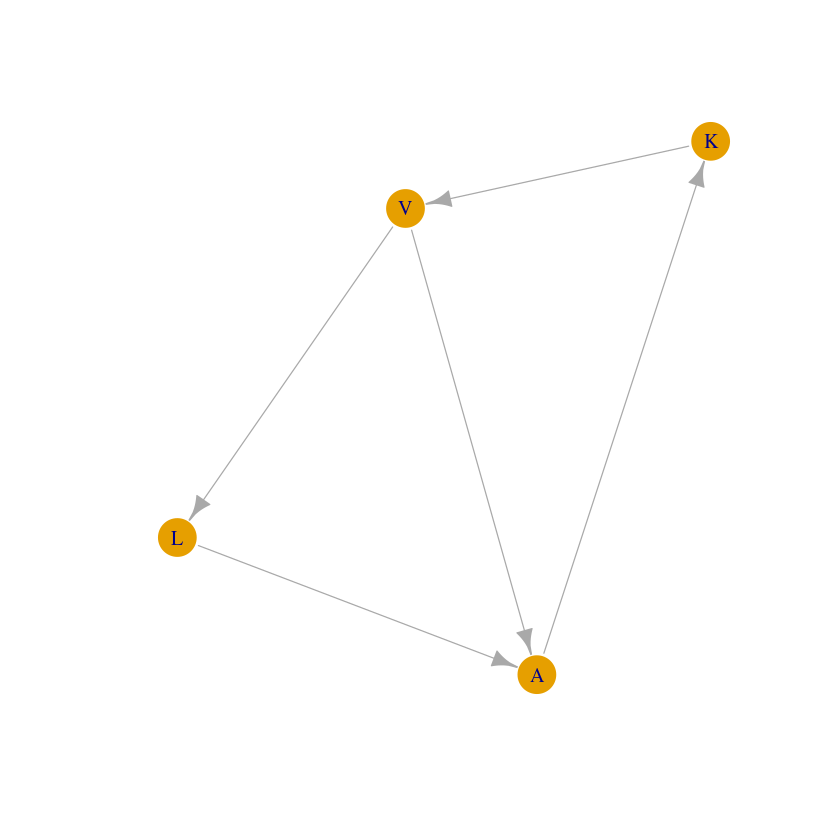

In [8]:
G2 <- make_graph(edges = c("K", "V", "V", "L", "L", "A", "A", "K", "V", "A"))
plot(G2, layout = Koenigsberg_layout)

Partendo dal nodo V arriviamo al nodo A. 
Un cammino Euleriano su un multigrafo è un cammino che tocca tutti i suoi archi una e una sola volta.

Notiamo che...

### Dall'astrazione, alla generalizzazione: Il teorema di Eulero

Un grafo connesso possiede un circuito Euleriano se e solo se tutti i suoi vertici hanno grado pari.

Quando consideriamo cammini Euleriani, ammettiamo che esattamente due vertici (quello iniziale e quello finale) abbiano grado dispari.

In [9]:
degree(Koenigsberg)

Altstadt-Loebenicht            Kneiphof  Vorstadt-Haberberg               Lomse 
                  3                   5                   3                   3

Un altro tipico esempio di un problema reale risolto tramite la teoria dei grafi è quello dei quattro colori (o cinque, nella sua versione più semplice). Si veda [la mia presentazione per OrientaEstate 2019](https://gbertagnolli.github.io/post/2019-08-23-network-science/).


## Dai grafi alle reti complesse

Quando usiamo l'astrazione in termini di nodi e connessioni per rappresentare un sistema complesso, quel che ne risulta viene chiamata rete complessa (complex network).

* Cos'è un sistema complesso?
* Esempi di reti, come astrazioni di sistemi reali

## References


[Complexity Explained](https://complexityexplained.github.io/) and 
[Complexity Explained (ITA)](https://complexityexplained.github.io/ComplexityExplained[Italian].pdf)

[Complexity explorables, Dirk Brockmann](http://www.complexity-explorables.org/)

---


Ognyanova, K. (2016) *Networks analysis with R and igraph: NetSci X Tutorial.* Retrieved from [www.kateto.net/networks-r-igraph](http://kateto.net/networks-r-igraph).

[R igraph manual pages](https://igraph.org/r/doc/)

[Networkx tutorial](https://networkx.org/documentation/stable/tutorial.html)

[Network analysis with Julia](https://github.com/JuliaGraphs/JuliaGraphsTutorials)



## Appendice

Salviamo il multigrafo dei ponti di Koenigsberg come edgelist
`write_graph(Koenigsberg, file = "../data/Koenigsberg.edgelist", format = "gml")`

Per leggere questa edgelist in python come un multigrafo, dobbiamo aggiungere manualmente `multigraph 1` nelle prime righe del file, con gli altri attributi del grafo (vedi file in `data/`.
